# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: preficting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [3]:
# Import Tensorflow

import tensorflow as tf
print(tf.__version__)

2.16.1


## Creating data to view and fit

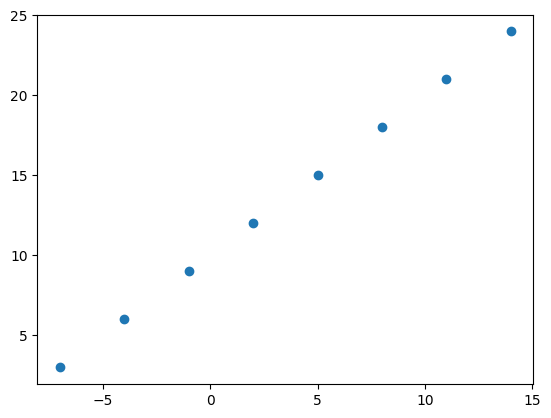

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y);


In [5]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [6]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(['bedrooom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

2024-04-19 10:22:55.073802: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-04-19 10:22:55.073819: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-19 10:22:55.073824: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-19 10:22:55.074138: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-19 10:22:55.074154: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedrooom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
X[0], Y[0]

(-7.0, 3.0)

In [8]:
X[1], Y[1]

(-4.0, 6.0)

In [9]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [10]:
X[0].ndim

0

In [11]:
X[0], Y[0]

(-7.0, 3.0)

In [12]:
# Turn our Numpy arrays into tensors

X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

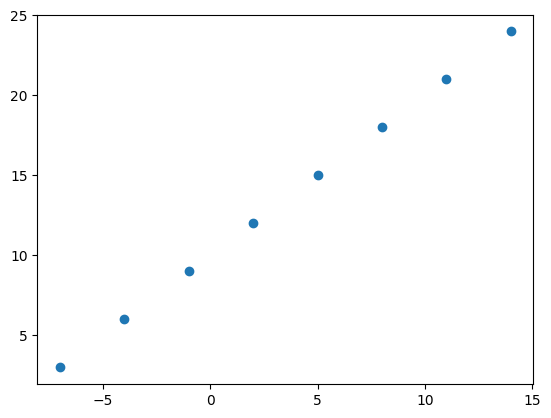

In [14]:
plt.scatter(X, Y)

## Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compliling a model** - define the loss function (in other words, the function which tells out model how wrong it is) and the optimizer (tells our model how to imporve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and label)

In [15]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Tensors expect multidimetional vectors
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)


X = tf.constant(X)
Y = tf.constant(Y)

In [16]:
# Turn our NumPy arrays into tensors with dtype float32

X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X, Y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

### Steps in modelling with TensorFlow

1. Construct or import a pretrained model relevant to your problem
2. Complie the model (prepare it to be used with data)
   1. **Loss** - How wrong your model's predictions are compared to the truth labels (you want to minimise this)
   2. **Optimizer** - How your model should update its internal patterns to better its predictions
   3. **Metrics** - Human interpretable values for how well your model is doing
3. Fit the model to the training data so it can discover patterns
   1. **Epochs** - How many times the model will go through all of the training examples
4. Evaluate the model on the test data (How reliable are our model's predictions?)

In [17]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# It can be done with model.add(tf.keras.layers.Dense(1)) instead of passing the list inside the model

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"]
              ) 

# 3. Fit the model
model.fit(X, Y, epochs=5)



Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 13.1001 - mae: 13.1001
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.9676 - mae: 12.9676
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.8351 - mae: 12.8351


2024-04-19 10:22:55.430749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.7026 - mae: 12.7026
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.5701 - mae: 12.5701


### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Create a model** - Here we might add more layers, increase the number of hidden units (also called neurons) within each of the hideen layers, change the activation function of each layer.
2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function
3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from). 

In [18]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. Fit the model (this time we'll train for longer)

model.fit(X, Y, epochs=100) # We're trying to improve loss to be lower than 100

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 12.7099 - mae: 12.7099
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.5774 - mae: 12.5774
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.4449 - mae: 12.4449
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.3124 - mae: 12.3124
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.1799 - mae: 12.1799
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.0474 - mae: 12.0474
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.9149 - mae: 11.9149
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.7824 - mae: 11.7824
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.6499 - mae: 11.6499
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.5174 - mae: 11.5174
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.3849 - mae: 11.3849
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.2524 - mae: 11.2524
Epoch 13/100
1/1 ━━━━━━━

In [19]:
# Remind ourselves of the data
X, Y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

In [20]:
# Let's see if our model's prediction has improved...

import numpy as np

# Prepare the input data for prediction
input_data = np.array([17.0]).reshape(-1, 1)  # Reshape the data

# Make a prediction
prediction = model.predict(input_data)

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[29.682856]]


In [21]:
# Let's see if we can make another change to improve the model

# 1. Create the model with an extra hidden layer with 100 hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

# 3. Fit the model (this time we'll train for longer)

model.fit(X, Y, epochs=100) # We're trying to improve loss to be lower than 100

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - loss: 12.0849 - mae: 12.0849
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.4098 - mae: 11.4098
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10.7247 - mae: 10.7247
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.0276 - mae: 10.0276
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.3154 - mae: 9.3154
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.5856 - mae: 8.5856
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.8355 - mae: 7.8355
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.0627 - mae: 7.0627
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.8517 - mae: 6.8517
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.2443 - mae: 7.2443
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.5377 - mae: 7.5377
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.7507 - mae: 7.7507
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [22]:
# Let's see if our model's prediction has improved...

import numpy as np

# Prepare the input data for prediction
input_data = np.array([17.0]).reshape(-1, 1)  # Reshape the data

# Make a prediction
prediction = model.predict(input_data)

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[27.151217]]


In [23]:
# The alteration in the learning rate was the most important hiperparameter

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate ir -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evalueate it ....
```


When it comes to evaluation.. there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of the model line up against the ground truth (the original labels)

In [24]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make labels for the dataset

Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

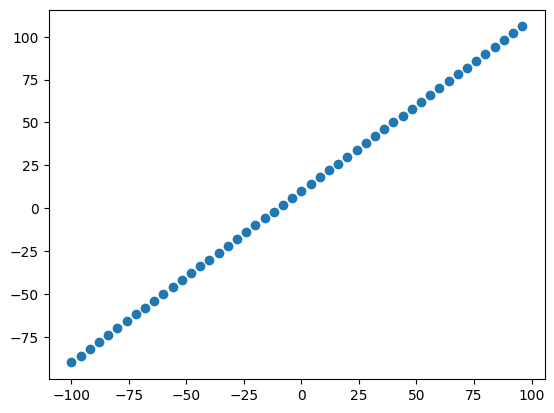

In [26]:
# Visualize the data

import matplotlib.pyplot as plt

plt.scatter(X, Y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10 - 15% of the data available
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10 - 15% of the total data available.

In [27]:
# Check the length of how many samples we have
len(X)

50

In [28]:
# Split the data into train and test sets
x_train = X[:40] # Fist 40 are training samples (80% of the data)
y_train = Y[:40]

x_test = X[40:] # Last 10 are testing samples (20% of the data)
y_test = Y[40:]

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets..., let's visualize it again!

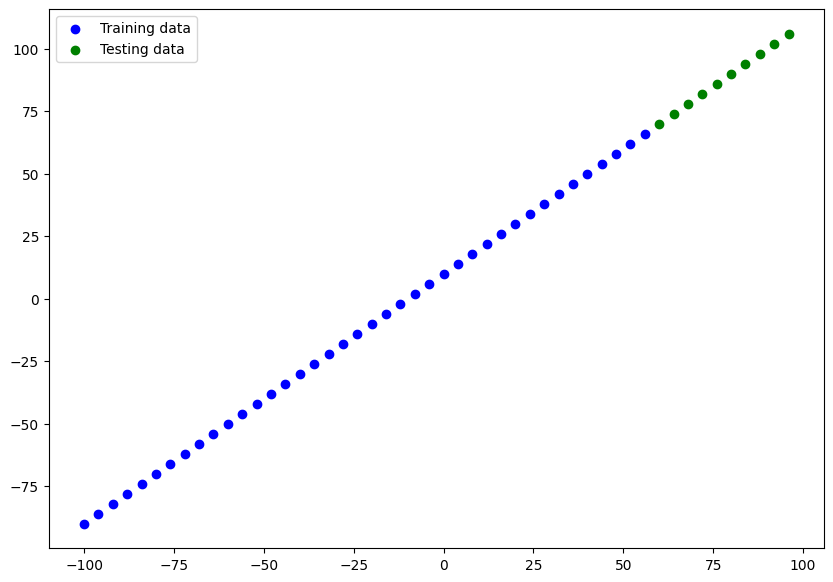

In [29]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(x_test, y_test, c="g", label="Testing data")

# Show a legend
plt.legend();

### Visualizing the model

In [30]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)




/Users/willianribeiro/Documents/GitHub/tensorflow-experiments/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total params** - total number of parameters in the model.
* **Trainable params** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable params** - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, checkout MIT introduction to deeplearning video

In [32]:
# Let's fit our model to the training data
model.fit(x_train, y_train, epochs=100, verbose=0)

In [33]:
# Get a summary of our model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

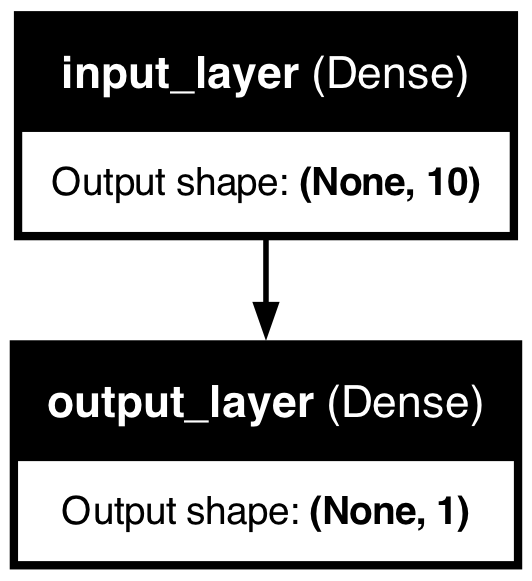

In [34]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True, show_layer_names=True)

### Visualizing our model's prediction

To visualize our model's prediction, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model prediction)

In [35]:
# make some predictions
y_pred = model.predict(x_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[42.8466  ],
       [45.593445],
       [48.340286],
       [51.087124],
       [53.833965],
       [56.580803],
       [59.327644],
       [62.074482],
       [64.82133 ],
       [67.56817 ]], dtype=float32)

In [36]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If  you fell like you're going to reuse some kind of functionality in the future, it's good to transform it into a function

In [37]:
# Let's create a plotting function
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")

    # Show a legend
    plt.legend();
    

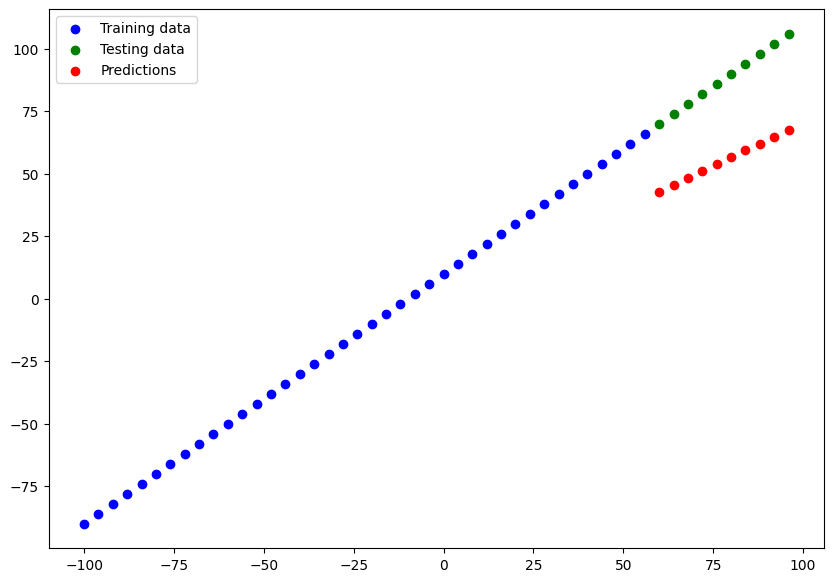

In [38]:
plot_predictions()

### Evaluate our model's prediction with regression evaluate metrics

Depending on the problem you're working on there's gonna be different evaluation metrics to evaluate your model's performance.

Since we're working with a regression model, two of the main metrics are:

* **MAE (Mean absolute error)** - "on average, how wrong is each of our model,s prediction"
* **MSE (Mean square error)** - "square the average errors"


In [39]:
# Evaluate the model on the test
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 32.7926 - mae: 32.7926


[32.7926139831543, 32.7926139831543]

In [40]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([42.8466  , 45.593445, 48.340286, 51.087124, 53.833965, 56.580803,
       59.327644, 62.074482, 64.82133 , 67.56817 ], dtype=float32)>

In [41]:
y_pred

array([[42.8466  ],
       [45.593445],
       [48.340286],
       [51.087124],
       [53.833965],
       [56.580803],
       [59.327644],
       [62.074482],
       [64.82133 ],
       [67.56817 ]], dtype=float32)

In [42]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [43]:
# Calculate the mean absolute error
mae = tf.metrics.MAE(y_test, tf.constant(y_pred))
print(mae)

# Note to myself, to get the MAE value as a scalar
mae_value = tf.reduce_mean(mae)
print(mae_value)

tf.Tensor(
[27.1534   28.406555 29.659714 30.912876 32.166035 33.419197 34.672356
 35.925518 37.178673 38.43183 ], shape=(10,), dtype=float32)
tf.Tensor(32.792614, shape=(), dtype=float32)


In [44]:
mse = tf.metrics.MSE(y_test, y_pred)
print(mse)
mse_value = tf.reduce_mean(mse)
print(mse_value)

tf.Tensor(
[ 737.3071  806.9324  879.6986  955.6059 1034.6538 1116.8428 1202.1722
 1290.6428 1382.2537 1477.0056], shape=(10,), dtype=float32)
tf.Tensor(1088.3115, shape=(), dtype=float32)


### Running experiments to improve our model

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer
3. Train for longer - give your model more chance to find a pattern in the data

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs 

**Build** `model_1`

In [45]:
x_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [46]:
x_train = tf.constant(x_train)
x_train = tf.expand_dims(x_train, axis=-1)  # Adds an additional dimension
y_train = tf.constant(y_train)


In [47]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.constant(x_train), tf.constant(y_train), epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11.5838 - mae: 11.5838 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.5616 - mae: 8.5616 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.0304 - mae: 10.0304 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.7294 - mae: 11.7294 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.6714 - mae: 8.6714 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.1401 - mae: 10.1401 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.8750 - mae: 11.8750 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.7811 - mae: 8.7811 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.2499 - mae: 10.2499 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.0428 - mae: 12.0428 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.5454 - mae: 12.5454 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.9650 - mae: 7.9650 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


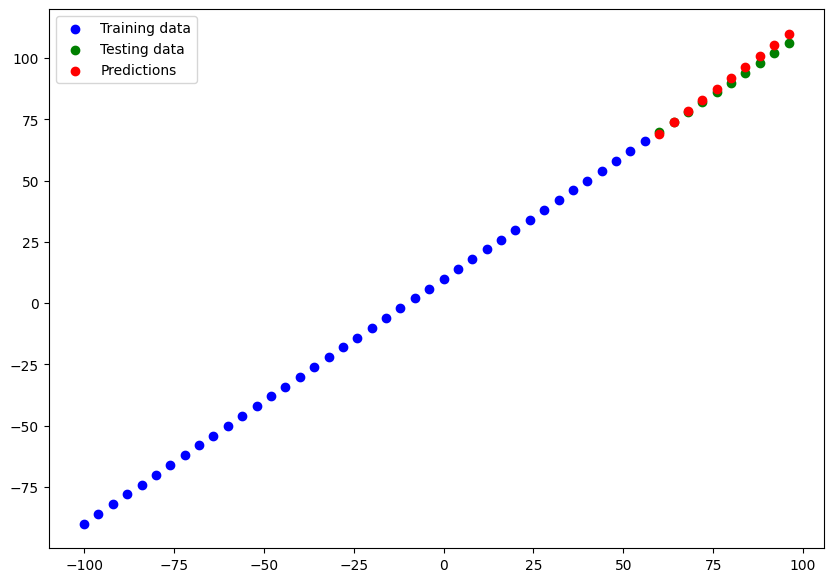

In [48]:
# Make and plot predictions
y_preds_1 = model_1.predict(x_test)
plot_predictions(predictions=y_preds_1)

In [49]:
# Calculate model_1 evaluation metrics

mae_value_1 = tf.reduce_mean(tf.metrics.MAE(y_test, tf.constant(y_preds_1)))
print(mae_value)

mse_value_1 = tf.reduce_mean(tf.metrics.MSE(y_test, y_preds_1))
print(mse_value)

tf.Tensor(32.792614, shape=(), dtype=float32)
tf.Tensor(1088.3115, shape=(), dtype=float32)


**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [50]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.constant(x_train), tf.constant(y_train), epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 30.7582 - mae: 30.7582 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.9446 - mae: 22.9446 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.4273 - mae: 19.4273 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.7007 - mae: 17.7007 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.0236 - mae: 17.0236 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.8153 - mae: 11.8153 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.6941 - mae: 14.6941 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.5410 - mae: 15.5410 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.6508 - mae: 11.6508 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.6201 - mae: 14.6201 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.6749 - mae: 15.6749 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.9195 - mae: 11.9195 
Epoch 13/100
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


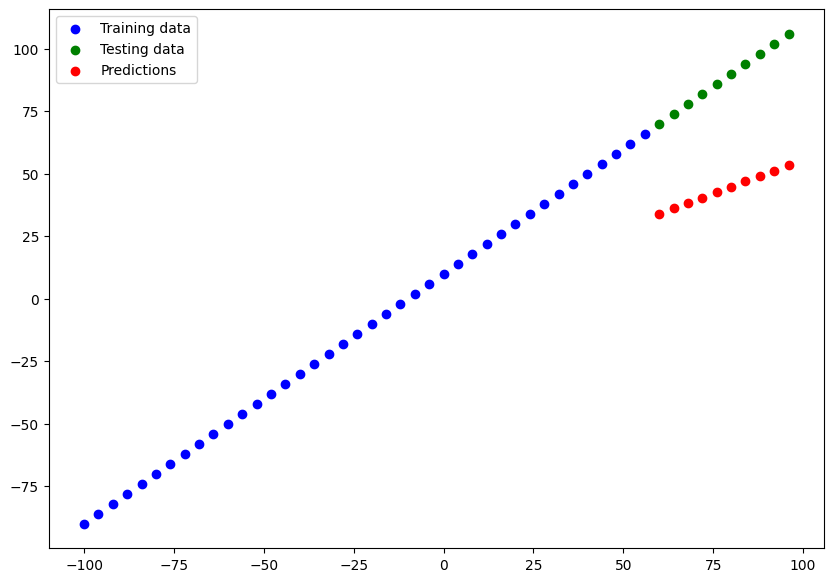

In [51]:
# Make and plot predictions
y_preds_2 = model_2.predict(x_test)
plot_predictions(predictions=y_preds_2)

In [52]:
# Calculate model_1 evaluation metrics

mae_value_2 = tf.reduce_mean(tf.metrics.MAE(y_test, tf.constant(y_preds_2)))
print(mae_value)

mse_value_2 = tf.reduce_mean(tf.metrics.MSE(y_test, y_preds_2))
print(mse_value)

tf.Tensor(32.792614, shape=(), dtype=float32)
tf.Tensor(1088.3115, shape=(), dtype=float32)


**Build `model_3`**

* 2 layers, trained for 500 epochs

In [53]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.constant(x_train), tf.constant(y_train), epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 55.5807 - mae: 55.5807 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.5523 - mae: 26.5523 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.5472 - mae: 23.5472 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.4351 - mae: 19.4351 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.3780 - mae: 17.3780 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.3846 - mae: 16.3846 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.7637 - mae: 16.7637 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.8783 - mae: 11.8783 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.7973 - mae: 14.7973 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.7295 - mae: 15.7295 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.8814 - mae: 11.8814 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.8850 - mae: 14.8850 
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


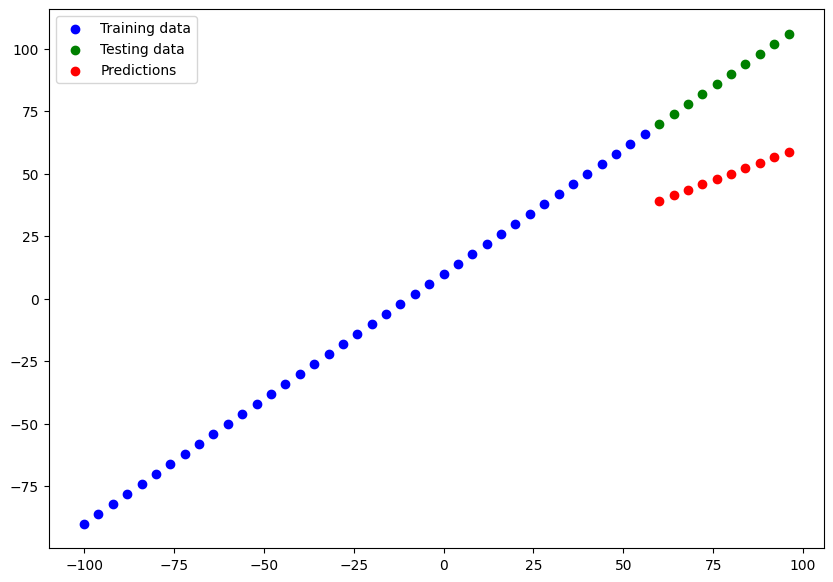

In [54]:
# Make and plot predictions
y_preds_3 = model_3.predict(x_test)
plot_predictions(predictions=y_preds_3)

In [55]:
# Calculate model_1 evaluation metrics

mae_value_3 = tf.reduce_mean(tf.metrics.MAE(y_test, tf.constant(y_preds_3)))
print(mae_value)

mse_value_3 = tf.reduce_mean(tf.metrics.MSE(y_test, y_preds_3))
print(mse_value)

tf.Tensor(32.792614, shape=(), dtype=float32)
tf.Tensor(1088.3115, shape=(), dtype=float32)


🔑 **Note:** You want to start with small experiments (small models) and make sure they work before start scalling

# Comparing the results of our experiments

In [56]:
# Let's compare our model's results using a pandas Dataframe

import pandas as pd

model_results = [["model_1", mae_value_1.numpy(), mse_value_1.numpy()],
                 ["model_2", mae_value_2.numpy(), mse_value_2.numpy()],
                 ["model_3", mae_value_3.numpy(), mse_value_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,1.796486,4.814865
1,model_2,44.312298,1991.497437
2,model_3,38.992172,1547.259766


Looks like `model_1` perform the best

In [57]:
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

🔑 **Note:** One of our main gols should be minimize the time between your experiments. The more experiments you do, the more things you'll figure out tha does work

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tooks to help us!

📖 **Resource**: as you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into tensorflow).

## Saving our models

Saving our models allows us to use them outside the JupiterNotebook

There are two main formats we can save our model's too:

1. The SaveModel format
2. The HDF5 format

In [60]:
# Save a model usign the save model format 
model_1.save("best_model_SaveModel_format.keras") # Recomended to use inside tensorflow

In [61]:
# Save model using the HDF5_format

model_1.save("best_model_HDF5_format.h5") # Best to use the model in external resources

## Loading in a  saved model format

In [65]:
loaded_SavedModel_format = tf.keras.models.load_model("/Users/willianribeiro/Documents/GitHub/tensorflow-experiments/models/01_neural_network_regression_with_tensorflow/best_model_SaveModel_format.keras")

loaded_SavedModel_format.summary()



/Users/willianribeiro/Documents/GitHub/tensorflow-experiments/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 2 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4 (20.00 B)

In [66]:
# Compare model_1 predictions with loaded model predictions

model_1_preds = model_1.predict(x_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(x_test)
model_1_preds == loaded_SavedModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])